## Aim
This script is used to train the models

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


In [7]:
# Load the processed data
X_train = np.load('data/split/X_train.npy')
y_train = np.load('data/split/y_train.npy')
X_test = np.load('data/split/X_test.npy')
y_test = np.load('data/split/y_test.npy')

## Model1: NN
Train with a neural network model

In [24]:
# Reshape the data
X_train_reshaped = X_train.reshape(-1, 100, 100, 1)
X_test_reshaped = X_test.reshape(-1, 100, 100, 1)
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define the model creation function
def create_model(units1, units2, units3, units4, units5, units6, units7, units8, learning_rate):
    model = Sequential([
        Input(shape=(100, 100)),
        Flatten(),
        Dense(units=units1, activation='relu'),
        Dense(units=units2, activation='relu'),
        Dense(units=units3, activation='relu'),
        Dense(units=units4, activation='relu'),
        Dense(units=units5, activation='relu'),
        Dense(units=units6, activation='relu'),
        Dense(units=units7, activation='relu'),
        Dense(units=units8, activation='relu'),
        Dense(3, activation='softmax')  # Output layer for 3 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Wrap the model using KerasClassifier
keras_model = KerasClassifier(
    model=create_model,
    verbose=1,  # Verbosity level for training
    units1=4048, units2=2048, units3=1024, units4=512,
    units5=256, units6=128, units7=64, units8=32,
    learning_rate=0.001, batch_size=32, epochs=10  # Default values
)

# Step 3: Define the hyperparameter grid
param_dist = {
    'model__units1': [4048, 2048],
    'model__units2': [2048, 1024],
    'model__units3': [1024, 512],
    'model__units4': [512, 256],
    'model__units5': [256, 128],
    'model__units6': [128, 64],
    'model__units7': [64, 32],
    'model__units8': [32, 16],
    'model__learning_rate': [0.001, 0.0001],
    'batch_size': [16, 32, 64],  # Not prefixed with `model__`
    'epochs': [10, 20]          # Not prefixed with `model__`
}

# Step 4: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    keras_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Step 5: Fit the model
random_search.fit(X_train_reshaped, y_train_encoded)  # Replace with your training data

# Step 6: Get the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/20
Epoch 1/20
Epoch 1/10
Epoch 1/20
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.2928 - loss: 2.99344
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.3481 - loss: 2.9778102
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3082 - loss: 2.3583
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 686ms/step - accuracy: 0.3229 - loss: 1.9884
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 648ms/step - accuracy: 0.3608 - loss: 1.4723
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3225 - loss: 1.3504381
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3417 - loss: 1.1390
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3991 - loss: 1.205245
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 527ms/step - accuracy: 0.4714 - loss: 1.0557
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 568ms/step - accuracy: 0.4676 - loss: 0.9588
Epoch 3/10
8/

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/stepaccuracy: 0.5820 - loss: 0.88 0.757
3/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5703 - loss: 0.8834Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step   - accuracy: 0.5828 - loss: 0.86.785
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5582 - loss: 0.82848
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3964 - loss: 1.1016Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3942 - loss: 1.0995
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5446 - loss: 0.92931
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 511ms/step - accuracy: 0.6647 - loss: 0.7925
1/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6406 - loss: 0.957847

30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5810 - loss: 0.8657  
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5571 - loss: 0.871455
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 570ms/step - accuracy: 0.5013 - loss: 0.965
 3/30 ━━━━━━━━━━━━━━━━━━━━ 21s 783ms/step - accuracy: 0.7014 - loss: 0.7201Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - accuracy: 0.5082 - loss: 0.96
 7/30 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5095 - loss: 0.9690Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4964 - loss: 0.990467
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4957 - loss: 0.93080
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5340 - loss: 0.9400
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5578 - loss: 0.8382
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5885 - loss: 0.8568
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3550 - loss: 1.7259
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━

/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5574 - loss: 0.8845
11/30 ━━━━━━━━━━━━━━━━━━━━ 18s 999ms/step - accuracy: 0.4151 - loss: 1.0959

30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5802 - loss: 0.84409
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/stepacy: 0.7500 - loss: 0.62oss: 1.
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4511 - loss: 1.0334.87
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4899 - loss: 1.0192873
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 978ms/step - accuracy: 0.5224 - loss: 0.8745
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 931ms/step - accuracy: 0.5726 - loss: 0.8716
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5763 - loss: 0.9290096
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5541 - loss: 0.94790969
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 914ms/step - accuracy: 0.3823 - loss: 1.0970
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/steptep - accuracy: 0.5652 - loss: 0.88
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4664 - loss: 0.9401.101
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 840ms/step - accuracy: 0.6273 - loss: 0.8235
Epoch 15/20


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5727 - loss: 0.8787
 3/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/stepEpoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/stepp - accuracy: 0.3767 - loss: 1.09
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3168 - loss: 1.06450.892
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5425 - loss: 0.97320.891
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 938ms/step - accuracy: 0.5374 - loss: 0.8656
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 759ms/step - accuracy: 0.3664 - loss: 1.0967
Epoch 20/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 914ms/step - accuracy: 0.3863 - loss: 0.954890
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 953ms/step - accuracy: 0.5532 - loss: 0.9654
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 990ms/step - accuracy: 0.5839 - loss: 0.861097
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 729ms/step - accuracy: 0.5238 - loss: 0.8811
 2/15 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step accuracy: 0.5797 - loss: 0.885099

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step accuracy: 0.5610 - loss: 0.865
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 939ms/step - accuracy: 0.5657 - loss: 0.8936
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 869ms/step - accuracy: 0.5699 - loss: 0.9016
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 870ms/step - accuracy: 0.5577 - loss: 0.8638
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 665ms/step - accuracy: 0.5644 - loss: 0.9185
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 703ms/step - accuracy: 0.5170 - loss: 0.8947
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 580ms/step - accuracy: 0.3329 - loss: 1.0993
5/8 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step - accuracy: 0.5717 - loss: 0.8654

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step accuracy: 0.5668 - loss: 0.
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 767ms/step - accuracy: 0.5635 - loss: 0.8622
Epoch 15/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 749ms/step - accuracy: 0.5633 - loss: 0.8612
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 766ms/step - accuracy: 0.5829 - loss: 0.8659
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.5557 - loss: 0.8551
Epoch 16/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 576ms/step - accuracy: 0.5274 - loss: 0.9187
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.6051 - loss: 0.8708
Epoch 13/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 606ms/step - accuracy: 0.5492 - loss: 0.8547
Epoch 17/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 605ms/step - accuracy: 0.5858 - loss: 0.8474
Epoch 15/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 586ms/step - accuracy: 0.5826 - loss: 0.8644
Epoch 14/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 529ms/step - accuracy: 0.5826 - loss: 0.8613
Epoch 18/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.5331 - loss: 0.8567
Epoch 16

In [43]:
# Build an NN model based on the best parameters
model = Sequential([
  Input(shape=(100,100,1)),   # The image is 100x100 pixels.
  Flatten(),
  Dense(units=4048, activation='relu'),
  Dense(units=2048, activation='relu'),  # Increased dense layer size
  Dense(units=512, activation='relu'),  # Increased dense layer size                                      
  Dense(units=256, activation='relu'),  # Increased dense layer size
  Dense(units=128, activation='relu'),  # Increased dense layer size
  Dense(units=64, activation='relu'),  # Increased dense layer size
  Dense(units=32, activation='relu'),  # Increased dense layer size
  Dense(units=16, activation='relu'),  # Increased dense layer size
  Dense(3, activation='softmax')  # Two state classification - gives probability of belonging to class 0 or 1
])

In [44]:
model.compile(optimizer=Adam(learning_rate= 0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy', 'categorical_accuracy'])

# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4048)           │    40,484,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 2048)           │     8,292,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,000,627 (190.74 MB)

 Trainable params: 50,000,627 (190.74 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(x=X_train_reshaped, y=y_train_encoded, batch_size=64,
                      epochs=20, shuffle=True,
                      validation_split=0.2)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.3145 - categorical_accuracy: 0.3145 - loss: 1.1210 - val_accuracy: 0.2917 - val_categorical_accuracy: 0.2917 - val_loss: 1.0504
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.4311 - categorical_accuracy: 0.4311 - loss: 1.0386 - val_accuracy: 0.5486 - val_categorical_accuracy: 0.5486 - val_loss: 0.9512
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.5121 - categorical_accuracy: 0.5121 - loss: 0.9551 - val_accuracy: 0.5556 - val_categorical_accuracy: 0.5556 - val_loss: 0.9314
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.5588 - categorical_accuracy: 0.5588 - loss: 0.9185 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.5625 - val_loss: 1.0277
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.5738 - categorical_accuracy: 0.5738 - loss: 0.9136 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.5625 - val_loss: 0.8884
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 1

In [46]:
epochs = history.epoch
hist = pd.DataFrame(history.history)
hist

,accuracy,categorical_accuracy,loss,val_accuracy,val_categorical_accuracy,val_loss
0,0.338542,0.338542,1.110071,0.291667,0.291667,1.050407
1,0.496528,0.496528,1.012840,0.548611,0.548611,0.951250
2,0.505208,0.505208,0.953347,0.555556,0.555556,0.931435
3,0.579861,0.579861,0.902570,0.562500,0.562500,1.027669
4,0.579861,0.579861,0.905976,0.562500,0.562500,0.888446
5,0.597222,0.597222,0.867138,0.513889,0.513889,0.898375
6,0.559028,0.559028,0.899122,0.506944,0.506944,1.091604
7,0.571181,0.571181,0.888384,0.562500,0.562500,0.887707
8,0.593750,0.593750,0.879305,0.548611,0.548611,0.882863
9,0.592014,0.592014,0.848051,0.569444,0.569444,0.873907


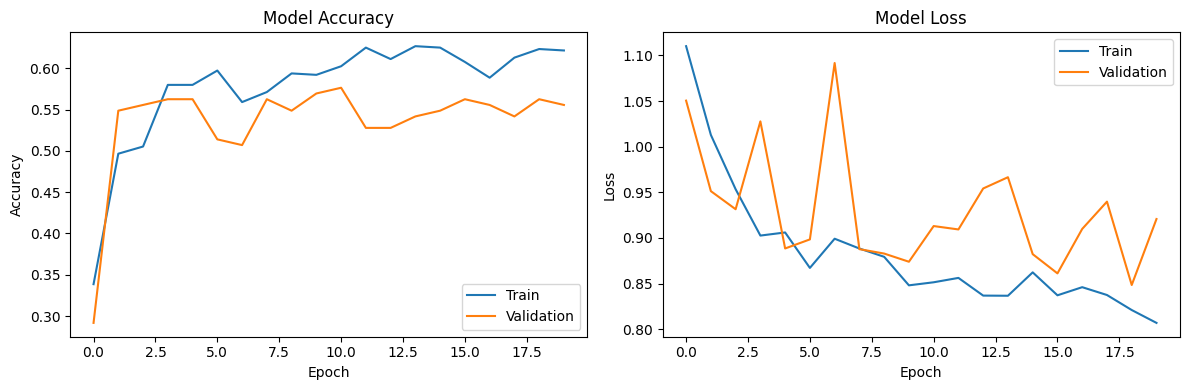

In [47]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

Problems in this model:
1. Oververfitting Pattern: The validation accuracy (red line) initially improves but shows fluctuations or even starts to decline after a certain point (around 10–15 epochs). This indicates overfitting: the model is learning the training data too well but failing to generalize to unseen validation data.
2. Instability in valadation accuracy: The validation accuracy fluctuates significantly, suggesting that the model might be sensitive to the validation dataset, or there might be issues with the data distribution, insufficient regularization, or hyperparameter choices.
3. Performance Plateau: After a few epochs (around 5–7 epochs), the training accuracy plateaus, but the validation accuracy does not show consistent improvement. This might indicate that the model has reached its learning capacity for the given data or architecture.
4. High Loss: The loss values (both training and validation) are relatively high, indicating that the model is not performing well. This suggests that the model is not able to learn the underlying patterns in the data effectively.
5. Low Accuracy: The overall accuracy of the model is low, indicating that the model is not able to correctly classify the majority of the test data. This suggests that the model is not able to generalize well to unseen data.

In [48]:
# Use the model to make predictions on the testset
y_pred_prob = model.predict(X_test_reshaped)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [49]:
y_pred_prob[0:20]

array([[0.58101285, 0.18702695, 0.23196024],
       [0.02136412, 0.5684401 , 0.41019586],
       [0.62094176, 0.2041308 , 0.17492738],
       [0.07929966, 0.35768226, 0.5630181 ],
       [0.5910271 , 0.19077823, 0.21819463],
       [0.01975966, 0.36037067, 0.61986977],
       [0.5349329 , 0.24415171, 0.2209154 ],
       [0.5597753 , 0.22584033, 0.21438429],
       [0.55576783, 0.2271038 , 0.21712828],
       [0.6107998 , 0.2414141 , 0.1477861 ],
       [0.562564  , 0.24383195, 0.19360402],
       [0.00108821, 0.9066671 , 0.09224472],
       [0.00342187, 0.9153462 , 0.08123191],
       [0.5620379 , 0.18622051, 0.25174165],
       [0.01311765, 0.7220667 , 0.26481575],
       [0.00401372, 0.23785107, 0.75813526],
       [0.60221493, 0.24173123, 0.15605384],
       [0.0052508 , 0.52042866, 0.47432053],
       [0.00123915, 0.2900057 , 0.7087551 ],
       [0.570366  , 0.2080656 , 0.22156833]], dtype=float32)

In [50]:
y_pred = y_pred_prob.argmax(axis=1)
y_pred


array([0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2,
       1, 1, 0, 0])

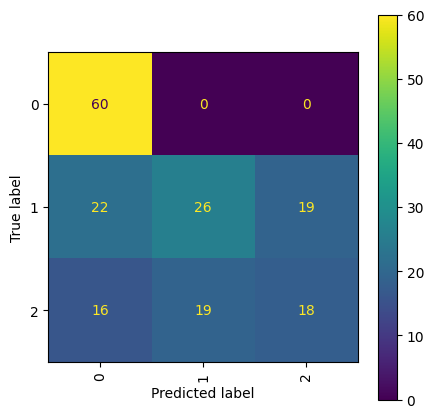

In [51]:
cm  = confusion_matrix(y_test, y_pred)
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5, 5))
cmdisp.plot(include_values=True, cmap="viridis", ax=ax, xticks_rotation="vertical")
plt.show()

In [52]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        60
           1       0.58      0.39      0.46        67
           2       0.49      0.34      0.40        53

    accuracy                           0.58       180
   macro avg       0.56      0.58      0.54       180
weighted avg       0.56      0.58      0.54       180

